# Import Libs


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2 as cv2
from sklearn.model_selection import train_test_split
import random

In [2]:

# Define the path to the dataset directory
dataset_dir = 'C:\\Course\\Dataset'

# Lists to store image data and labels
image_data = []
labels = []

# Iterate through the dataset and load images and labels
for filename in os.listdir(dataset_dir):
    if filename.lower().endswith('.tif'):  # Check for TIF files, case-insensitive
        # Extract labels from the filename
        person_id, finger_id, scan_num = filename.split('_')
        person_id = int(person_id)  # Convert person ID to an integer
        finger_id = int(finger_id)  # Convert finger ID to an integer
        scan_num = int(scan_num.split('.')[0])  # Extract and convert scan number to an integer

        # Load the image
        img_path = os.path.join(dataset_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            image_data.append(img)
            labels.append((person_id, finger_id, scan_num))

# Now 'image_data' contains the loaded images, and 'labels' contains the corresponding labels


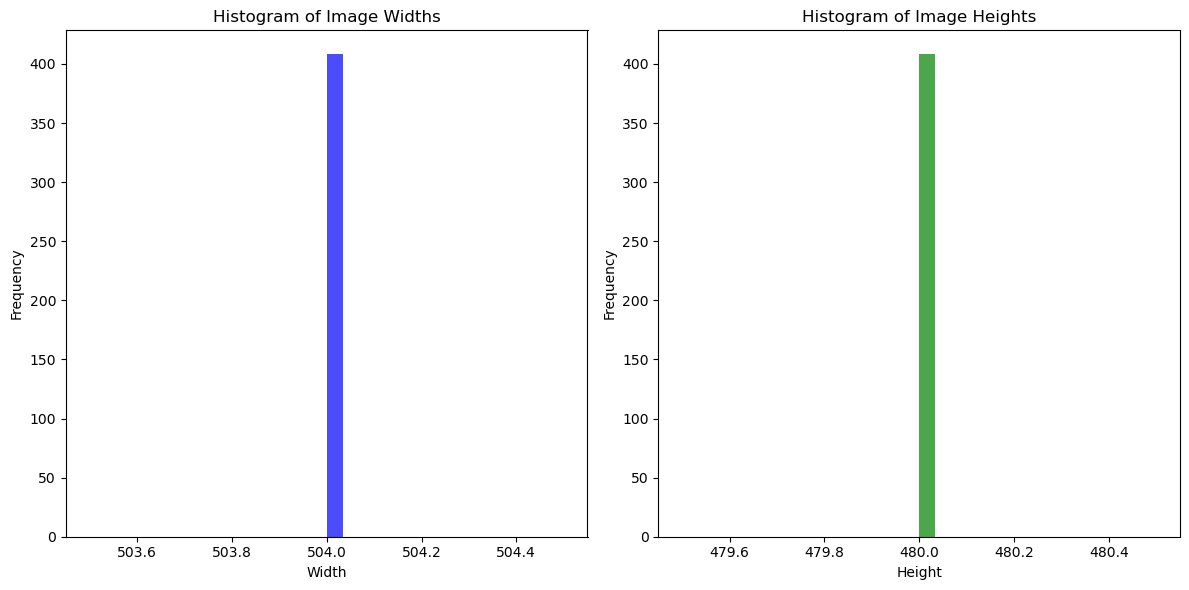

The best width for resizing is: **504**
The best height for resizing is: **480**


In [3]:


# Lists to store widths and heights
widths = []
heights = []

# Iterate through the dataset and collect image dimensions
for filename in os.listdir(dataset_dir):
        if img is not None:
            h, w = img.shape[:2]
            widths.append(w)
            heights.append(h)

# Create histograms for widths and heights
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Determine the best width and height for resizing (e.g., mode of the distributions)
best_width = max(set(widths), key=widths.count)
best_height = max(set(heights), key=heights.count)

print(f"The best width for resizing is: **{best_width}**")
print(f"The best height for resizing is: **{best_height}**")

# Now you can resize your images to best_width x best_height using cv2.resize()
# Example of resizing an image:
for i,img in enumerate(image_data):
    image_data[i] = cv2.resize(img, (best_width, best_height), interpolation=cv2.INTER_AREA)



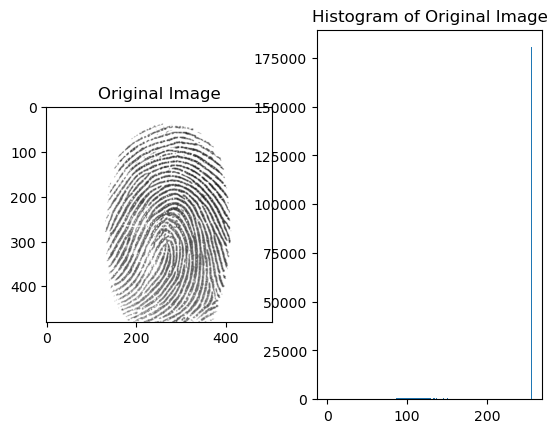

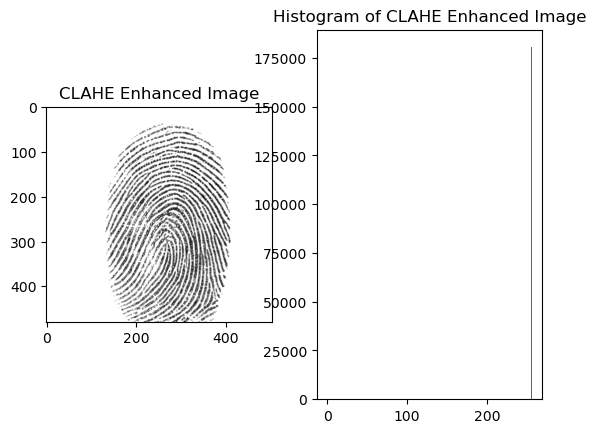

In [5]:
plt.figure()

# Assuming data is your set of images
img_test = image_data[50]  # Change index according to your dataset

# Plot original image and its histogram
plt.subplot(121)
plt.imshow(img_test, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.hist(img_test.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')

plt.show()


# Apply CLAHE to all images in the 'data' set
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
for i in range(len(image_data)):
    new = clahe.apply(image_data[i])
    image_data[i] = new

# Display the results after CLAHE
plt.figure()

# Plot CLAHE-enhanced image and its histogram for the same index
plt.subplot(121)
plt.imshow(image_data[50], cmap='gray')
plt.title('CLAHE Enhanced Image')

plt.subplot(122)
plt.hist(image_data[50].ravel(), 256, [0, 256])
plt.title('Histogram of CLAHE Enhanced Image')

plt.show()

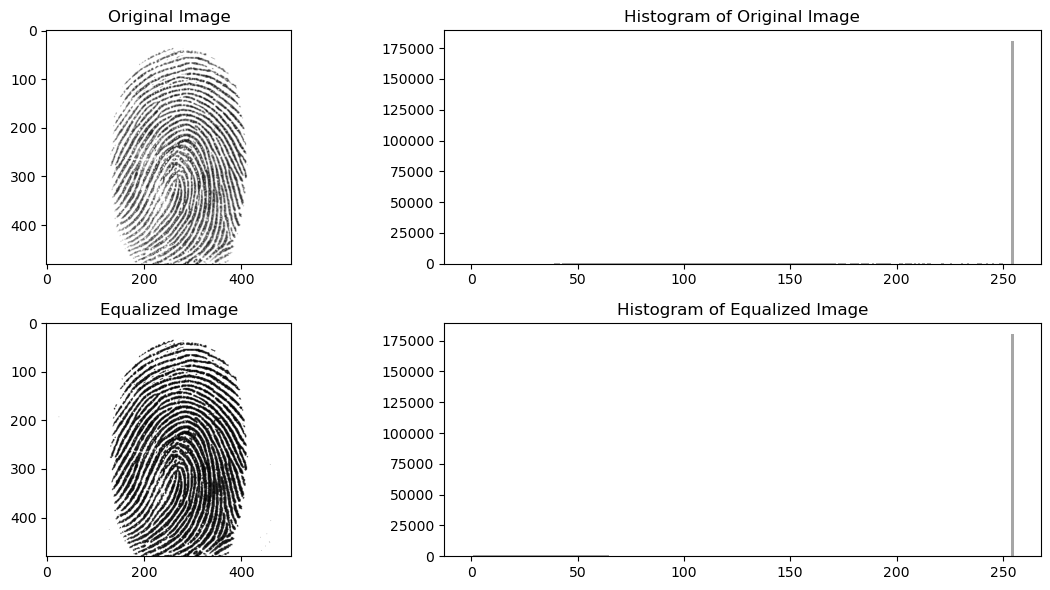

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'selected_image' is your selected image
selected_image = image_data[50]

# Apply histogram equalization
img_eq = cv2.equalizeHist(selected_image)

# Display the original image and its histogram
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(selected_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(selected_image.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram of Original Image')

# Display the equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(img_eq, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.hist(img_eq.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()


In [ ]:

# Iterate through the dataset and process images
for filename in os.listdir(dataset_dir):
        if img is not None:
            # Apply histogram equalization
            img_eq = cv2.equalizeHist(img)

            # Estimate orientations
            sobel_x = cv2.Sobel(img_eq, cv2.CV_64F, 1, 0, ksize=5)
            sobel_y = cv2.Sobel(img_eq, cv2.CV_64F, 0, 1, ksize=5)
            orientations = np.arctan2(sobel_y, sobel_x)

            # Display the original image, equalized image, and orientations
            plt.figure(figsize=(15, 5))
            plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
            plt.subplot(132), plt.imshow(img_eq, cmap='gray'), plt.title('Histogram Equalized')
            plt.subplot(133), plt.imshow(orientations, cmap='hsv'), plt.title('Orientations')
            plt.show()
